# Visualization
Key Visuals:
- Overview Map
- Base Map for Analysis
- Average Daily Usage
- Average Hourly Usage

## Import Shapefile

In [46]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

shapefile_path = "data/spatial/geo_export_86dc231e-3ba9-473c-a7a5-0e89f969d1f6.shp"
gdf = gpd.read_file(shapefile_path)

# convert to 2790
gdf = gdf.to_crs('EPSG:2790')

# compute new square foot areas
gdf['area_2790'] = gdf['geometry'].area

# drop old spatial columns
gdf = gdf.drop(columns = ["shape_area", "shape_len"])

## Overview Map

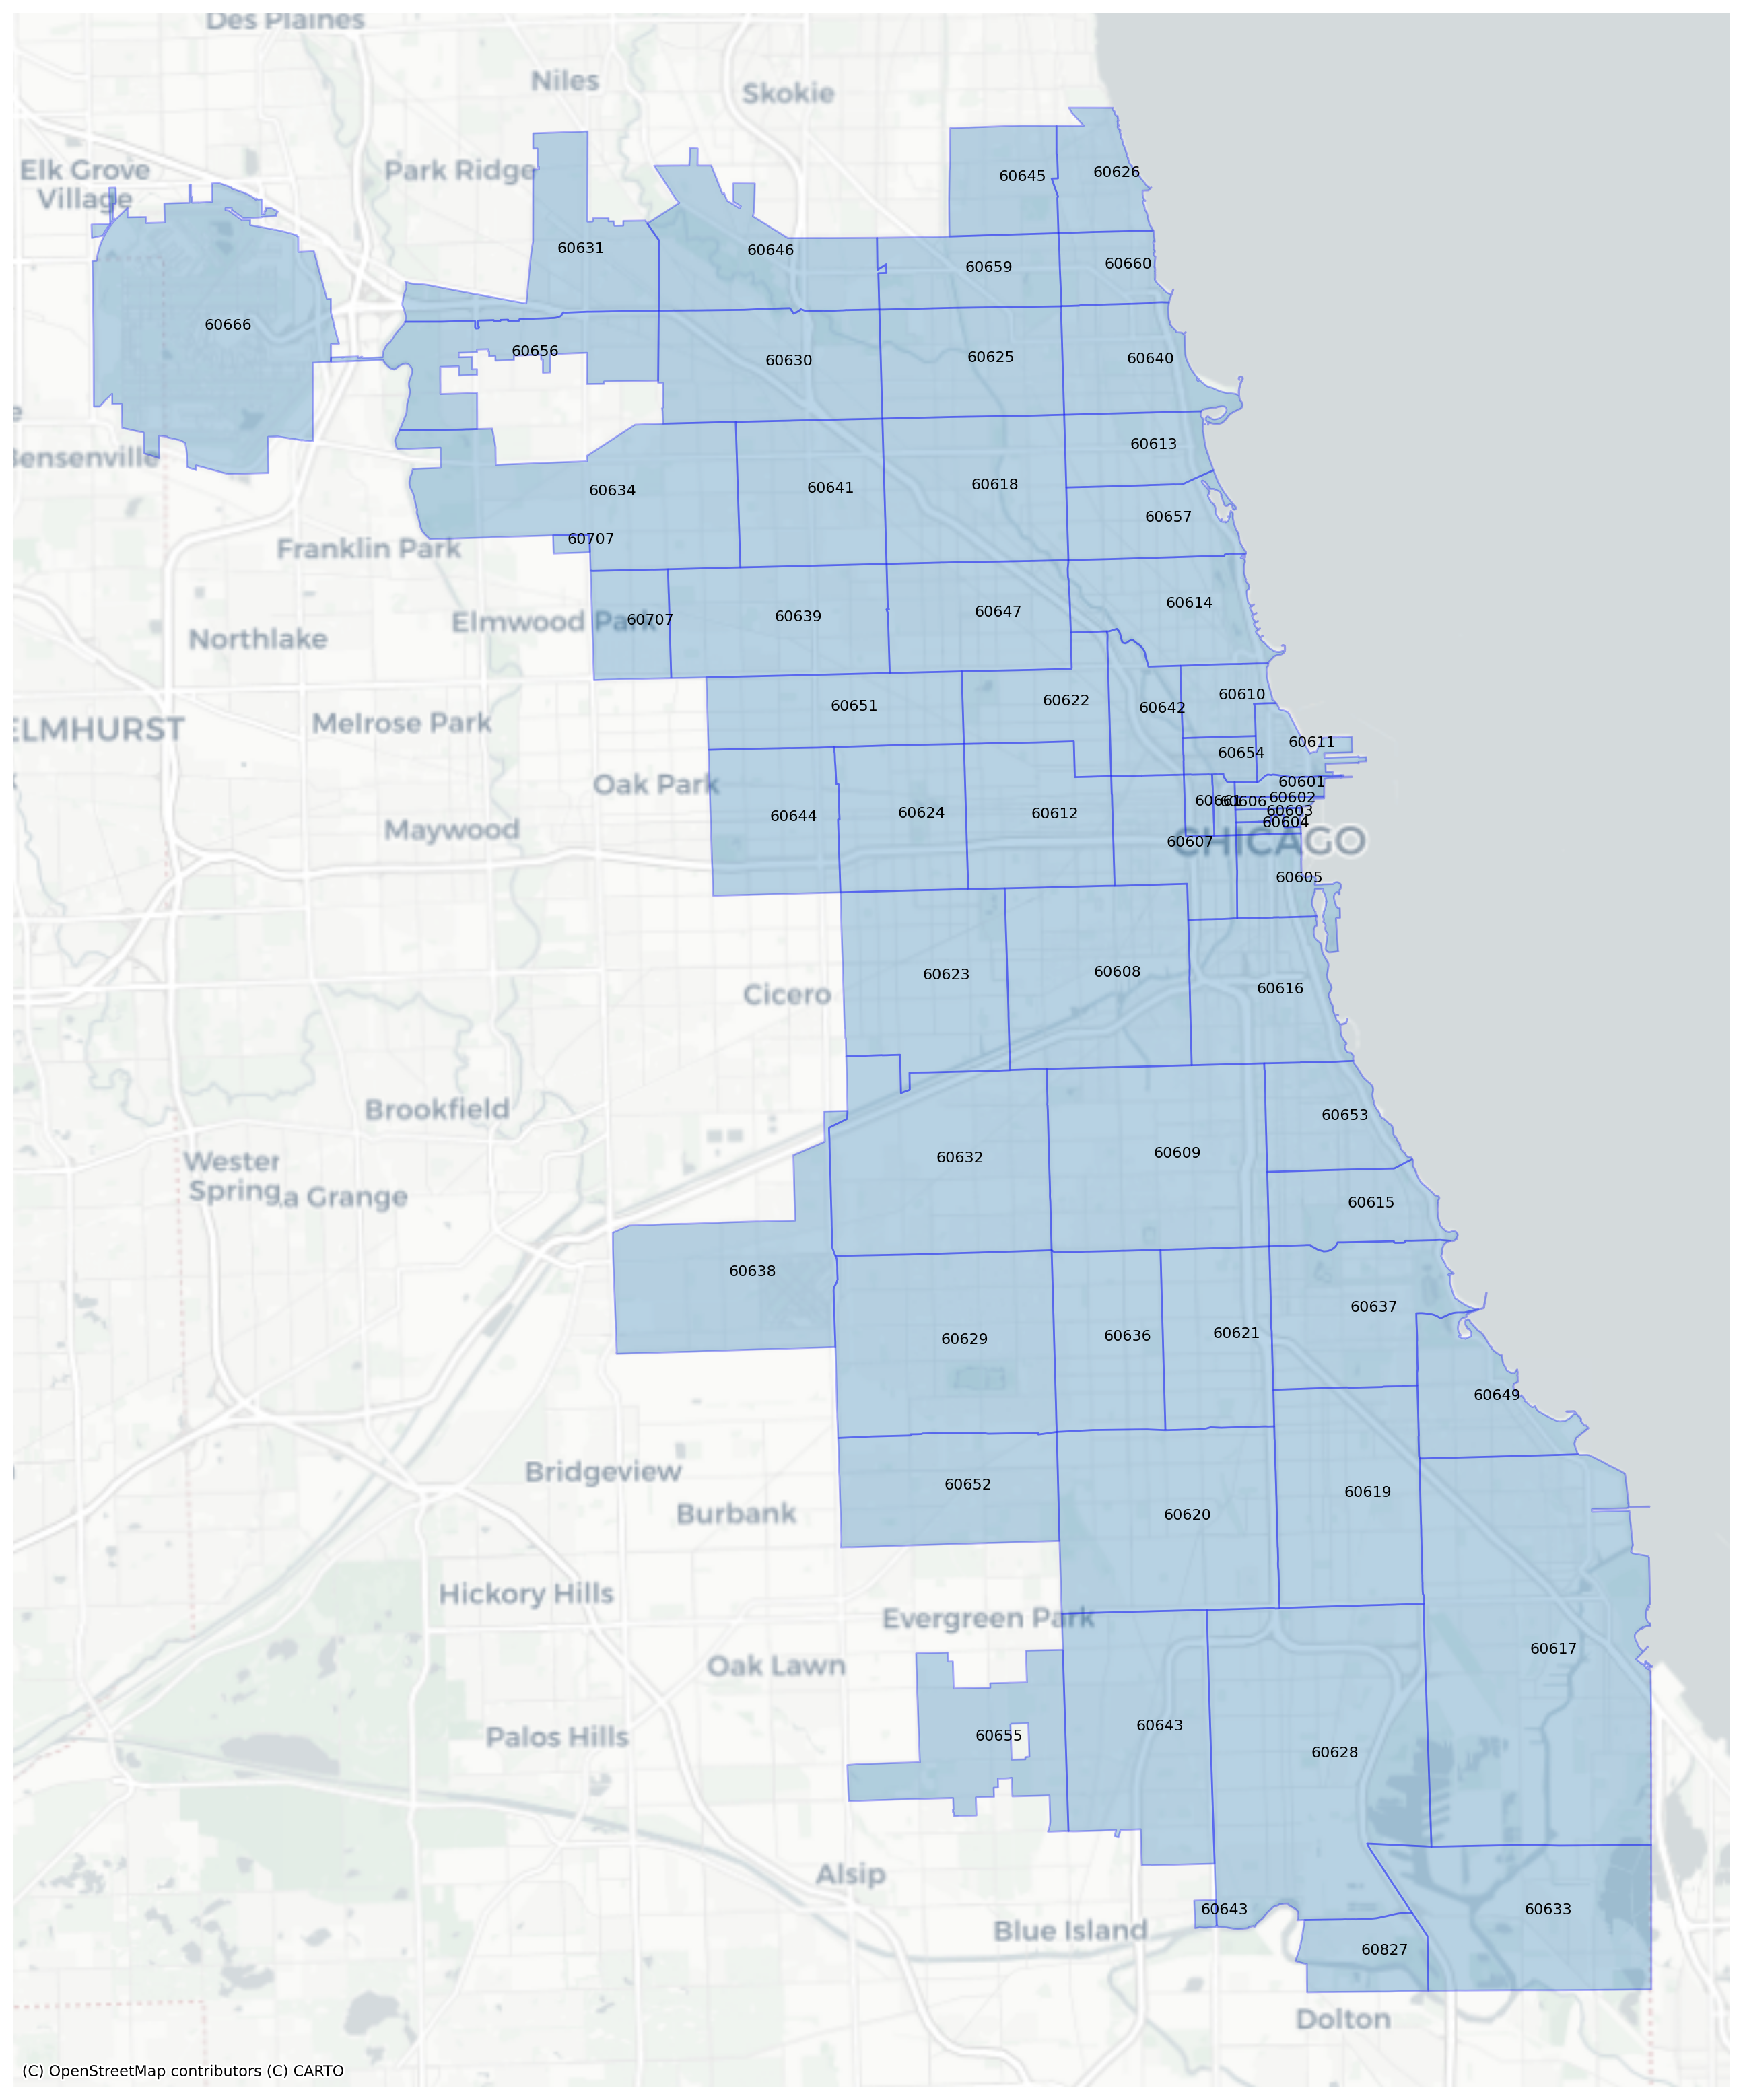

In [50]:
fig, ax = plt.subplots(figsize = (20,20), dpi = 200)


gdf.plot(ax = ax, alpha=0.3, edgecolor='b')

# show zipcodes
for idx, row in gdf.iterrows():
    plt.text(row.geometry.centroid.x-100, row.geometry.centroid.y, row['zip'], fontsize=8)

# add basemap
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.axis('off')

plt.show()